In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [31]:
(x_train,y_train1),(x_test,y_test1)=cifar100.load_data()
x_train=x_train.reshape(50000,1024,3).astype('float32')/255
x_test=x_test.reshape(10000,1024,3).astype('float32')/255

y_train=to_categorical(y_train1)
y_test=to_categorical(y_test1)

In [33]:
inputs=Input(shape=(1024,3))
rnn_layer=LSTM(256)(inputs)
rnn_layer1=Dense(128)(rnn_layer)
outputs=Dense(100,activation='softmax')(rnn_layer1)
model=Model(inputs,outputs)

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=64)

Epoch 1/5
704/704 [==============================] - 55s 74ms/step - loss: 4.5065 - accuracy: 0.0254 - val_loss: 4.4580 - val_accuracy: 0.0302
Epoch 2/5
704/704 [==============================] - 49s 70ms/step - loss: 4.3509 - accuracy: 0.0425 - val_loss: 4.3166 - val_accuracy: 0.0470
Epoch 3/5
704/704 [==============================] - 50s 71ms/step - loss: 4.2954 - accuracy: 0.0489 - val_loss: 4.2900 - val_accuracy: 0.0464
Epoch 4/5
704/704 [==============================] - 50s 71ms/step - loss: 4.2778 - accuracy: 0.0511 - val_loss: 4.3023 - val_accuracy: 0.0488
Epoch 5/5
704/704 [==============================] - 50s 72ms/step - loss: 4.2469 - accuracy: 0.0555 - val_loss: 4.5587 - val_accuracy: 0.0248


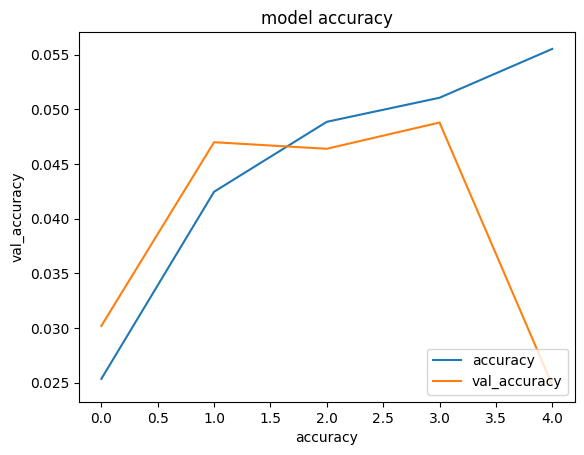

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

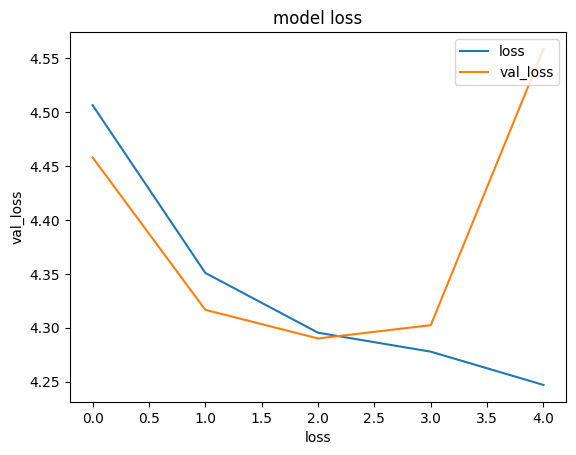

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [38]:
y_pred=model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [39]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test1)

0.0264